<a href="https://colab.research.google.com/github/smeenakshi1997/Translation_training/blob/main/Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers -Uqq
!pip install datasets -Uqq
!pip install bert-score -Uqq
!pip install sacremoses
!pip install ohmeow-blurr==0.0.24

     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 43.7 MB/s 
     |████████████████████████████████| 120 kB 23.4 MB/s 
     |████████████████████████████████| 431 kB 4.7 MB/s 
     |████████████████████████████████| 115 kB 62.0 MB/s 
     |████████████████████████████████| 212 kB 57.8 MB/s 
     |████████████████████████████████| 127 kB 46.8 MB/s 
     |████████████████████████████████| 60 kB 3.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 5.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=0280180e4251651c6e123bd39d3521685f140a7693457be3f7675dea8cbd9546
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pub

In [ ]:
#!pip install fastai==2.3.1      #version varies with update in colab verify: https://github.com/ohmeow/blurr/issues/21
#!pip install ohmeow-blurr==0.0.24      #version varies with update in colab verify: https://github.com/ohmeow/blurr/issues/21
##!pip install git+https://github.com/huggingface/transformers
##!pip install torch==1.7.1+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html
#!pip install transformers==4.3.3      #version varies with update in colab verify: https://github.com/ohmeow/blurr/issues/21
#!pip install bert-score -q

In [ ]:
import pandas as pd
from fastai.text.all import *
from transformers import *
from blurr.data.all import *
from blurr.modeling.all import *

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('SampleData (1).csv', error_bad_lines=False, sep=';', engine='python')
df = df.dropna().reset_index()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 14: ';' expected after '"'
Skipping line 16: ';' expected after '"'
Skipping line 19: ';' expected after '"'
Skipping line 20: ';' expected after '"'
Skipping line 24: ';' expected after '"'


In [ ]:
#Clean text
df['content'] = df['content'].apply(lambda x: x.replace('/',''))
df['content'] = df['content'].apply(lambda x: x.replace('\xa0',''))
df['content'] = df['content'].apply(lambda x: x.replace(':-',':'))
df['content'] = df['content'].apply(lambda x: x.replace('.-','.'))
df['content'] = df['content'].apply(lambda x: x.replace(' ,',', '))
df['content'] = df['content'].apply(lambda x: x.replace('.','. '))
df['content'] = df['content'].apply(lambda x: x.replace('  ',' '))
df.head()

,level_0,index,content,title
0,0,1,"Innovative impacts of Chief Minister's Relief Fund application developed for Chief Minister's Office, RTI Online application, RTI Portal forGovernment of Maharashtra: Bilingual application in open source technology. Work flow based ICT solution- Ease in decision making through proper monitoring- Citizen centric services are easily accessible to common citizens- User friendly application- Role based application processing- Reduction in human interferences- Regular decisions and calculations are inbuilt in the application so that they are devoid of human error. Yield of best practices and te...","The officer was involved in - Development and implementation of Chief Minister's Relief Fund application, RTI Online application, RTI Portal, SIMNIC and Credit Sales - Product enhancement for CMRF project - Development of Bilingual, responsive application in open source technology. - Management on Servers Web and DB with backup mechanism"
1,1,2,"1. Chief Ministers Relief Fund Application- Requirement analysis, Designing and Development and security auditing and Maintenance of Chief Ministers Relief Fund web based Bilingual Application for Chief Ministers Office, Government of Maharashtra using Open source technology in MVC model (Platform: Java, Struts2,PostgreSQL)- For this entire SDLC is followed and with special emphasis on users requirement specifications. Developed modules consisting of Citizen Centric Services like online donation and online application submission, Payment verification, Receipt generation, Enquiry services u...","The officer was involved in - Requirement analysis, Designing and Development and security auditing and Maintenance of web based Chief Ministers Relief Fund project - Bilingual Application for Chief Ministers Office, using Open source technology in MVC model (Platform:Java, Struts2, PostgreSQL) - Citizen Centric Services like online donation and online application submission, Payment verification, Receipt generation, Enquiry services using Payment Gateway with SMS, Email integration. - Implementation of RTI online and RTI Portal - Coordination in Implementation, Training and Support of Mah..."
2,2,3,"- Chief Ministers Relief Fund application enabled citizens to donate money to Chief Ministers office from any geographical location using online payment gateway with ease, with a feature of online receipt generation which citizen can use for Income tax ex","The officer was involved in - Design, development and implementation of ief Ministers Relief Fund application with integration of payment gateway, SMS and e-Mail. - Implementation of RTI Online application with payment gateway integration - Writing Shell Scripts and cron for service availability - Credit and Sales monitoring application - Development of Multidepartment projects locally in Open Source along with server administration"
3,3,4,"The technical coordination, the IT support to the various user department has always been done in the situation effective and efficacious manner. In order to make the district digitally efficacious and well benefited of the digital india schemes and vaious e-governance projects the implementation of the project were done timely and to the proper stake holders of a project. The various offices of the government in the district like transport,registry,mining offices were made cashless yielding a very transparent and corruption free environment. The BCC course and Tally course were tagged wit...","The Officer was involved - Implementation of digital india schemes and vaious e- governance projects - Migrated the district website under S3WaaS framework - Providing technical support for all the elections in the district - Implemented PMKISAN and CMKAY project in the district - Tested and implemented different software like EPMIS, Food DBT Portal, Force Deployment Portal, Covid registration portal, AApda Sampoorti portal etc.."
4,4,5,"To analyse a technical matter and to provide its systemat

In [ ]:
#Select only part of it (makes testing faster)
articles = df

In [ ]:
articles

,level_0,index,content,title
0,0,1,"Innovative impacts of Chief Minister's Relief Fund application developed for Chief Minister's Office, RTI Online application, RTI Portal forGovernment of Maharashtra: Bilingual application in open source technology. Work flow based ICT solution- Ease in decision making through proper monitoring- Citizen centric services are easily accessible to common citizens- User friendly application- Role based application processing- Reduction in human interferences- Regular decisions and calculations are inbuilt in the application so that they are devoid of human error. Yield of best practices and te...","The officer was involved in - Development and implementation of Chief Minister's Relief Fund application, RTI Online application, RTI Portal, SIMNIC and Credit Sales - Product enhancement for CMRF project - Development of Bilingual, responsive application in open source technology. - Management on Servers Web and DB with backup mechanism"
1,1,2,"1. Chief Ministers Relief Fund Application- Requirement analysis, Designing and Development and security auditing and Maintenance of Chief Ministers Relief Fund web based Bilingual Application for Chief Ministers Office, Government of Maharashtra using Open source technology in MVC model (Platform: Java, Struts2,PostgreSQL)- For this entire SDLC is followed and with special emphasis on users requirement specifications. Developed modules consisting of Citizen Centric Services like online donation and online application submission, Payment verification, Receipt generation, Enquiry services u...","The officer was involved in - Requirement analysis, Designing and Development and security auditing and Maintenance of web based Chief Ministers Relief Fund project - Bilingual Application for Chief Ministers Office, using Open source technology in MVC model (Platform:Java, Struts2, PostgreSQL) - Citizen Centric Services like online donation and online application submission, Payment verification, Receipt generation, Enquiry services using Payment Gateway with SMS, Email integration. - Implementation of RTI online and RTI Portal - Coordination in Implementation, Training and Support of Mah..."
2,2,3,"- Chief Ministers Relief Fund application enabled citizens to donate money to Chief Ministers office from any geographical location using online payment gateway with ease, with a feature of online receipt generation which citizen can use for Income tax ex","The officer was involved in - Design, development and implementation of ief Ministers Relief Fund application with integration of payment gateway, SMS and e-Mail. - Implementation of RTI Online application with payment gateway integration - Writing Shell Scripts and cron for service availability - Credit and Sales monitoring application - Development of Multidepartment projects locally in Open Source along with server administration"
3,3,4,"The technical coordination, the IT support to the various user department has always been done in the situation effective and efficacious manner. In order to make the district digitally efficacious and well benefited of the digital india schemes and vaious e-governance projects the implementation of the project were done timely and to the proper stake holders of a project. The various offices of the government in the district like transport,registry,mining offices were made cashless yielding a very transparent and corruption free environment. The BCC course and Tally course were tagged wit...","The Officer was involved - Implementation of digital india schemes and vaious e- governance projects - Migrated the district website under S3WaaS framework - Providing technical support for all the elections in the district - Implemented PMKISAN and CMKAY project in the district - Tested and implemented different software like EPMIS, Food DBT Portal, Force Deployment Portal, Covid registration portal, AApda Sampoorti portal etc.."
4,4,5,"To analyse a technical matter and to provide its systemat

Import Text and Set Up Data

In [ ]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR_MODEL_HELPER.get_hf_objects(pretrained_model_name, 
                                                                  model_cls=BartForConditionalGeneration) #replaced BLURR to BLURR_MODEL_HELPER
hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [ ]:
hf_batch_tfm = HF_Seq2SeqBeforeBatchTransform(hf_arch, hf_config, hf_tokenizer, hf_model, task='summarization',
text_gen_kwargs={'max_length': 250,
 'min_length': 50,
 'do_sample': False,
 'early_stopping': False,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False})

blocks = (HF_Seq2SeqBlock(before_batch_tfm=hf_batch_tfm), noop)

dblock = DataBlock(blocks=blocks, get_x=ColReader('content'), get_y=ColReader('title'), splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(articles, bs=2) #change bs to higher value after adjusting the head value based on resources

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3543: UserWarning: `as_target_tokenizer` is deprec

In [ ]:
len(dls.train.items), len(dls.valid.items)

(19, 4)

In [ ]:
b = dls.one_batch()
len(b), b[0]['input_ids'].shape, b[1].shape

(2, torch.Size([2, 1024]), torch.Size([2, 137]))

In [ ]:
dls.show_batch(dataloaders=dls, max_n=2) #max_n to show the loaded batch

Training

In [ ]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'en' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [ ]:
model = HF_BaseModelWrapper(hf_model)
learn_cbs = [HF_BaseModelCallback]
fit_cbs = [HF_Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze()

/usr/local/lib/python3.7/dist-packages/blurr/modeling/seq2seq/core.py:42: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  compute_func = hf_load_metric(metric_name).compute


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is d

SuggestedLRs(valley=0.0002290867705596611)

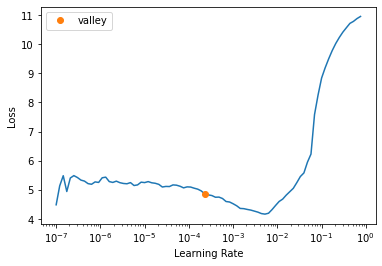

In [ ]:
#learn.lr_find()

In [ ]:
#b = dls.one_batch()
#preds = learn.model(b[0])
#len(preds),preds[0], preds[1].shape

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3543: UserWarning: `as_target_tokenizer` is deprec

(3,
 tensor(4.4782, device='cuda:0', grad_fn=<NllLossBackward0>),
 torch.Size([2, 137, 50264]))

In [ ]:
#b = dls.one_batch()
#preds = learn.model(b[0])
#len(preds),preds[0], preds[1].shape

(3,
 tensor(4.4019, device='cuda:0', grad_fn=<NllLossBackward0>),
 torch.Size([2, 137, 50264]))

In [ ]:
learn.fit_one_cycle(200, lr_max=3e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,5.045800,6.185607,0.283129,0.095587,0.192915,0.843335,0.833730,0.838437,00:58
1,5.046983,6.180299,0.279212,0.093477,0.189938,0.842413,0.833690,0.837957,00:11
2,5.031723,6.167645,0.279212,0.093477,0.189938,0.842413,0.833690,0.837957,00:11
3,5.010419,6.115673,0.273730,0.093864,0.181940,0.840090,0.831729,0.835816,00:11
4,4.995039,6.086704,0.278671,0.096527,0.185695,0.841741,0.833173,0.837364,00:11
5,4.958943,5.957592,0.281992,0.105897,0.196102,0.843713,0.832293,0.837901,00:11
6,4.914415,5.904468,0.261045,0.088302,0.186087,0.841782,0.832699,0.837155,00:11
7,4.870095,5.754100,0.267498,0.090123,0.190874,0.843685,0.833231,0.838366,00:11
8,4.799219,5.686243,0.274741,0.089274,0.193851,0.843202,0.833475,0.838253,00:11
9,4.731344,5.565625,0.267551,0.085405,0.188386,0.841021,0.833309,0.837072,00:11


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is d

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3543: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  "`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your "
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should 

In [ ]:
learn.show_results(learner=learn, max_n=2)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3668: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3543: UserWarning: `as_target_tokenizer` is deprec

Generate Predictions

In [ ]:
df['content'][17]

'1. Development of statistical report for e-registration that shows complete picture of the stateselected district within a selected period to track performance of deed registration. 2. Integration of ERegistration with RAS, Umang and CSC. 3. Integration of Various services of RCCMS like Judgement, Case Status etc with Umang App. 4. Creation of Scheduled Mail Service that sends emails to various administrative officers in districts regarding performance of each tehsilsubtehsil. 5. Relocation of scanned registered deeds data to the new provisioned storage. 6. Development of services of Scanned Deeds and Scanned mutation copy through CSC. 7. Integration of ERegistration status with HEPC dashboard. 8. Development of module of seeding details of disputed land in the RCCMS. 9. Development of portal for providing combined search page for properties in rural, ULB and HUDA under EoDB. 10. Development of stamp duty and registration fee calculation module and putting it onto the jamabandi websit

In [ ]:
outputs = learn.blurr_generate(df['content'][17], early_stopping=False, num_return_sequences=3)

for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1232: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


=== Prediction 1 ===
 The officer was involved in - Integration of ERegistration with RAS, Umang and CSC. - Seamless integration of Haris and Halris system. - SARAL Haryana: Service Online based platform for Haryanath department - Development of Services - Scanned Registered Deeds, Causelist and Judgement. - Gov Land: Web application that lists government properties to various users - Allows them to update it and add and update government properties. - Preparing report of filled girdawari performa for PM Kisan Samman Yojana - Created various databases which contain eligible DRman Samman data on various parameters for farmer data base. -

=== Prediction 2 ===
 The officer was involved in - Integration of ERegistration with RAS, Umang and CSC. - Seamless integration of Haris and Halris system. - SARAL Haryana: Service Online based platform for Haryanath department - Development of Services - Scanned Registered Deeds, Causelist and Judgement. - Gov Land: Web application that lists governm

Inference

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
learn.metrics = None
learn.export(fname='/content/drive/MyDrive/Summary_models/ft_cnndm_export_200epoch_250.pkl')

In [ ]:
text = "firstPara input : 1. Easy accessibility of immigration related services has streamlined the process of appointment and applications for various services at the Foreigners Registration Offices in Nagaland State2. Usage of Digital Signature Certificates for user authentication and role based access of databases3. Usage of Virtual Private Network to access IVFRT applications. Encrypted private data is safely and securely sent over the public network via crypto tokens4. Usage of centralized anti-virus software5. Usage of FTP Application Filezilla software from a system using Unix OS and encryption methodologies, for transferring data6. Usage of remote desktop applications such as AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications anddigital signature certificates.7. Providing timely database reports to competent authority for effective project monitoring 1. Easy accessibility of immigration related services has streamlined the process of appointment and applications for various services at the Foreigners Registration Offices in Nagaland State2. Usage of Digital Signature Certificates for user authentication and role based access of databases3. Usage of Virtual Private Network to access IVFRT applications. Encrypted private data is safely and securely sent over the public network via crypto tokens4. Usage of centralized anti-virus software5. Usage of FTP Application Filezilla software from a system using Unix OS and encryption methodologies, for transferring data6. Usage of remote desktop applications such as AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications anddigital signature certificates.7. Providing timely database reports to competent authority for effective project monitoring 1. Easy accessibility of immigration related services has streamlined the process of appointment and applications for various services at the Foreigners Registration Offices in Nagaland State2. Usage of Digital Signature Certificates for user authentication and role based access of databases3. Usage of Virtual Private Network to access IVFRT applications. Encrypted private data is safely and securely sent over the public network via crypto tokens4. Usage of centralized anti-virus software5. Usage of FTP Application Filezilla software from a system using Unix OS and encryption methodologies, for transferring data6. Usage of remote desktop applications such as AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications anddigital signature certificates.7. Providing timely database reports to competent authority for effective project monitoring"

In [ ]:
#from datasets import disable_caching
#disable_caching()

In [ ]:
inf_learn = load_learner(fname='/content/drive/MyDrive/Summary_models/ft_cnndm_export_200epoch_250.pkl') #Pickle file stores the inference i.e. the predictions/model in it. 
summary = inf_learn.blurr_generate(text, early_stopping=False) #test string

In [ ]:
print(summary[0])

 The officer was involved in - Usage of Digital Signature Certificates for user authentication and role based access of databases - Virtual Private Network to access IVFRT applications - Encrypted private data is safely and securely sent over the public network via crypto tokens - Use of remote desktop applications such as AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications and digital signature certificates. - Providing timely database reports to competent authority for effective project monitoring


 The officer was involved in - Usage of Digital Signature Certificates for user authentication and role based access of databases - Virtual Private Network to access IVFRT applications - Encrypted private data is safely and securely sent over the public network via crypto tokens - Use of remote desktop applications such as AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications and digital signature certificates. - Providing timely database reports to competent authority for effective project monitoring


 The officer was involved in - Usage of Digital Signature Certificates for user authentication and role based access of databases3. Usage of Virtual Private Network to access IVFRT applications. - Encrypted private data is safely and securely sent over the public network via crypto tokens. - Use of remote desktop applications such as AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications anddigital signature certificates. - Providing timely database reports to competent authority for effective project monitoring


 The officer was involved in - Usage of Digital Signature Certificates for user authentication and role based access of databases - Virtual Private Network to access IVFRT applications - Encrypted private data is safely and securely sent over the public network via crypto tokens - Use of remote desktop applications like AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications and digital signature certificates. - Providing timely database reports to competent authority for effective project monitoring

 The officer was involved in - Usage of Digital Signature Certificates for user authentication and role based access of databases - Virtual Private Network to access IVFRT applications - Encrypted private data is safely and securely sent over the public network via crypto tokens - Use of remote desktop applications like AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications and digital signature certificates. - Providing timely database reports to competent authority for effective project monitoring


 The officer was involved in - Usage of Digital Signature Certificates for user authentication and role based access of databases - Virtual Private Network to access IVFRT applications - Encrypted private data is safely and securely sent over the public network via crypto tokens - Use of remote desktop applications like AnyDesk, WebEx and TeamViewer to install, troubleshoot and configure applications and digital signature certificates. - Providing timely database reports to competent authority for effective project monitoring


 The officer was involved in - Implementation of e-Sign in various online personnel and administrative applications to facilitate workflow automation. - Various services and system had been merged into a single dashboard for Digital NIC portal.- KMS platform to share the knowledge and expertise of its employees among pan peers. - Centralised Sanction Management System has been developed and implemented for top management, it provides them the live snapshot of budget details i.e. allocation, expenditure and balance in various budget heads for all the DDO's of NIC.
